# Imports and Getting Data

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [28]:
df = pd.read_csv('kc_house_data 3.csv')

In [29]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
df.shape

(21613, 21)

In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Feature Engineering

# I. Dependent Variable (price)

### Remove Outliers

In [34]:
updated_df = df[(df.price < 2000000) & (df.bathrooms < 5) & (df.bedrooms <= 7) & (df.floors < 5)]

### Check Distribution of Dependent Variable (price)

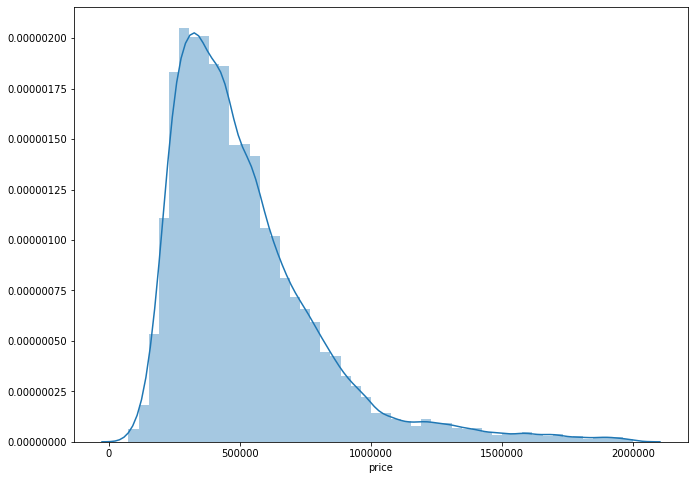

In [35]:
# df.price.hist()
plt.figure(figsize=(11,8)) 
sns.distplot(updated_df.price);

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([  75000.,   78000.,   80000., ..., 6885000., 7062500., 7700000.])),
 (309758.13838986744, 540088.1417665295, 0.8436045279057862))

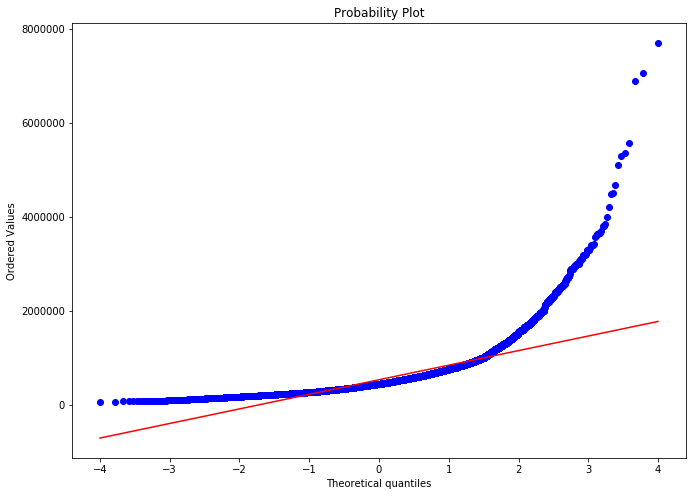

In [36]:

fig, ax=plt.subplots(figsize=(11,8))
sp.stats.probplot(df.price,plot=ax, fit=True)

### Log transform price to get a more normal distribution

In [37]:
updated_df['log_price'] = np.log(updated_df['price'])

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


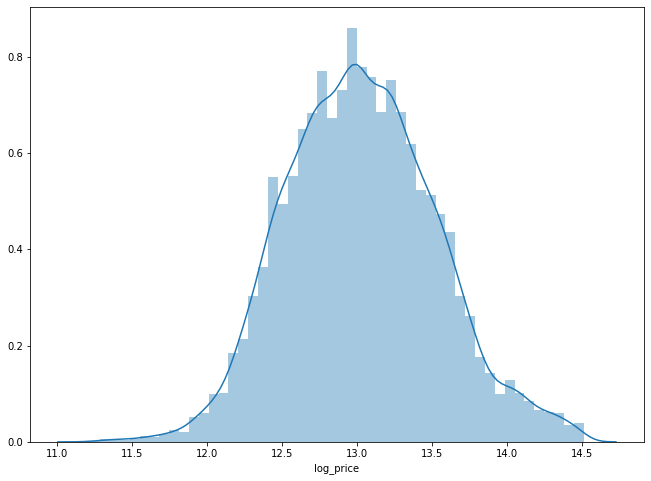

In [38]:
plt.figure(figsize=(11,8)) 
sns.distplot(updated_df['log_price']);

((array([-3.99415755, -3.77878758, -3.660972  , ...,  3.660972  ,
          3.77878758,  3.99415755]),
  array([11.22524339, 11.26446411, 11.28978191, ..., 14.50765724,
         14.50815761, 14.50863274])),
 (0.49800165763681126, 13.029256585492346, 0.9984879908237823))

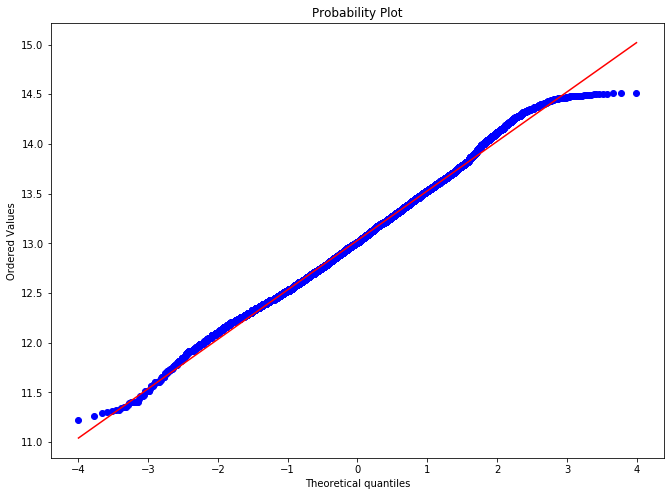

In [39]:
import scipy as sp
fig, ax=plt.subplots(figsize=(11,8))
sp.stats.probplot(updated_df.log_price,plot=ax, fit=True)

# II. Understanding Indedpendent Variables

## i. Initial Feature Engineering

In [40]:
updated_df['age'] = 2015-updated_df.yr_built


/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## ii. Correlation Between Independent Variables

In [41]:
# get predictors from dataframe
data_pred = updated_df.iloc[:,3:23].drop(['lat','long','yr_built','log_price'], axis=1)
data_pred.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'age'],
      dtype='object')

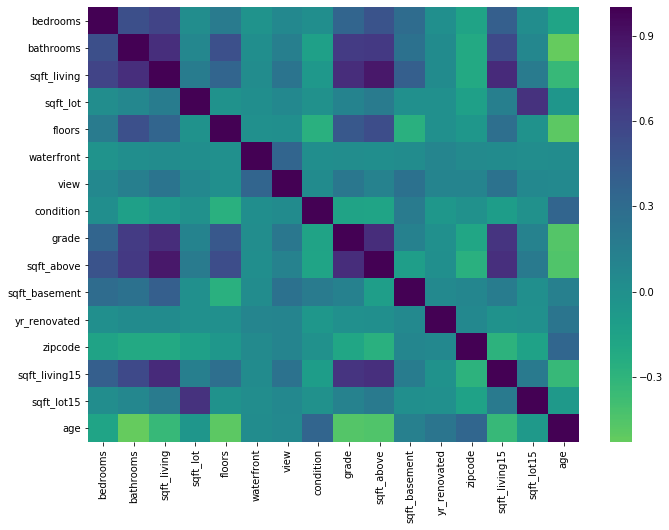

In [42]:
plt.figure(figsize=(11,8))
sns.heatmap(data_pred.corr(), center=0, cmap = 'viridis_r');

#### Interpretation of Correlation HeatMap for IV Above:
The key on the side allows us to identify the darker colors with high correlation between the independent variables.
We can see that many of the IV that work as indicators for size (such as sqft, bedrooms, bathrooms, etc.)
are correlated with one another. This will be good to keep in mind when building the model.

## iii. Distribution of Independent Variables

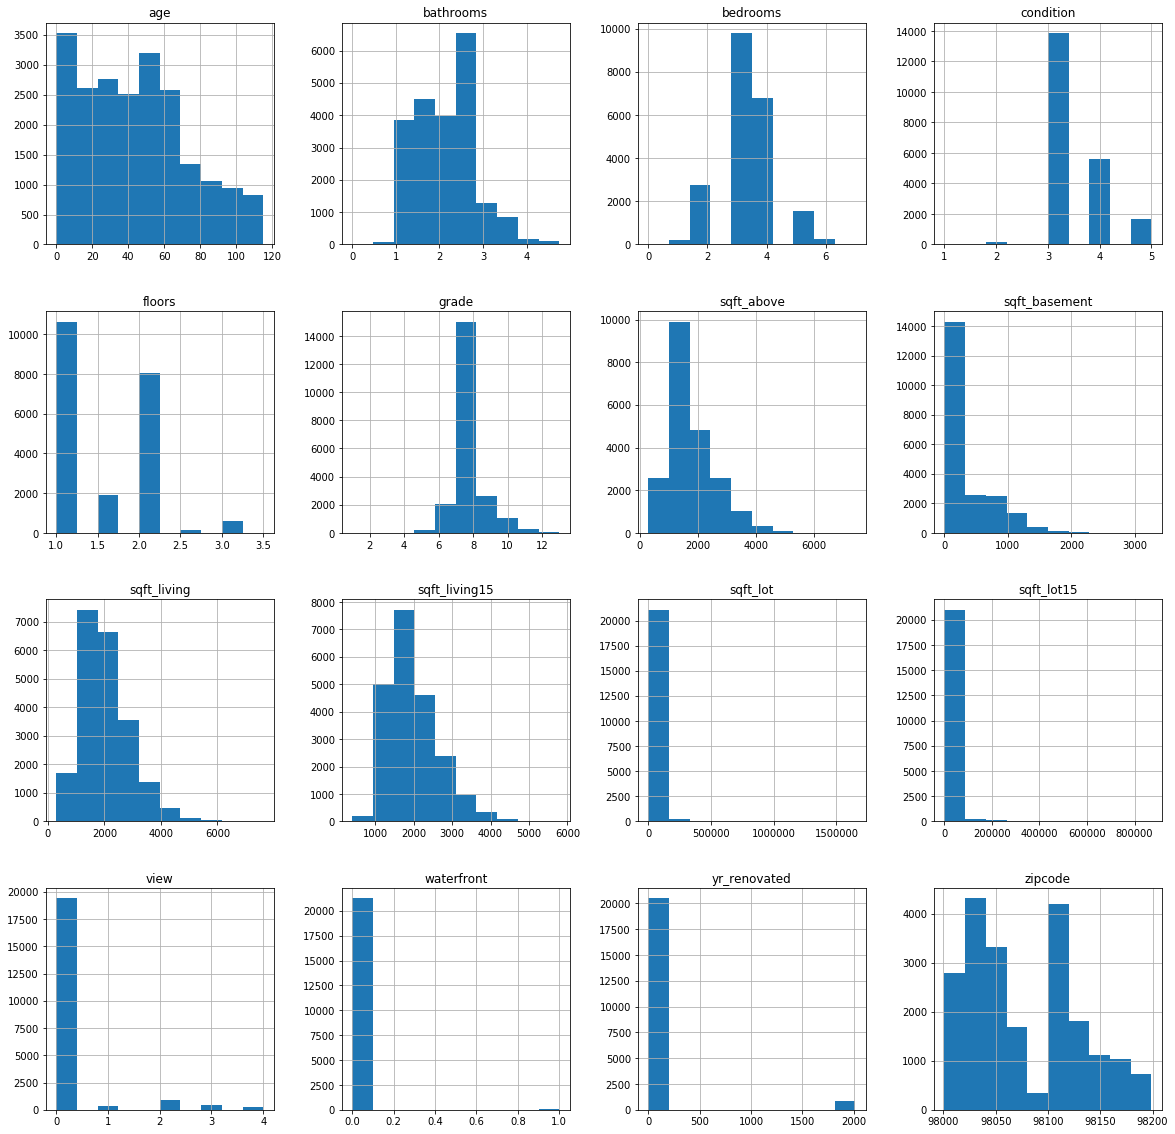

In [43]:
data_pred.hist(figsize  = [20,20]); 

In [53]:
#get continuous variables
cont_var = data_pred[['age','bedrooms','bathrooms','sqft_above',
                      'sqft_basement','sqft_living','sqft_living15',
                      'sqft_lot','sqft_lot15','floors','yr_renovated' ]]

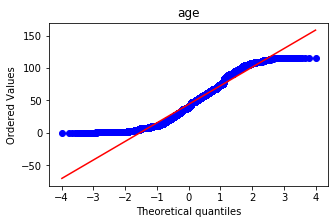

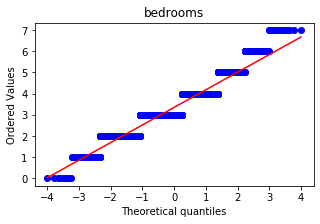

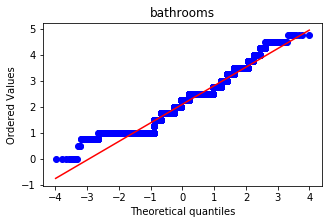

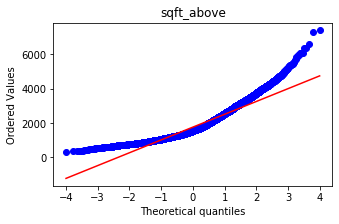

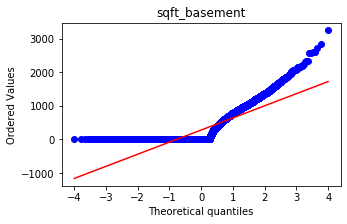

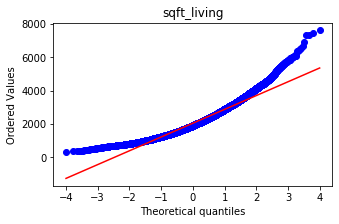

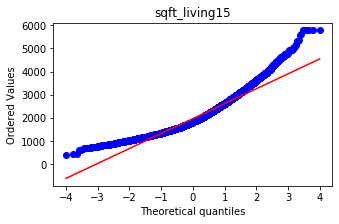

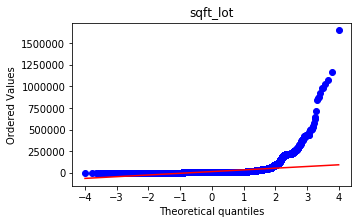

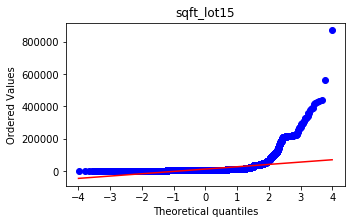

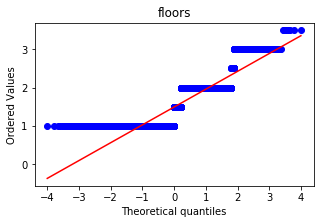

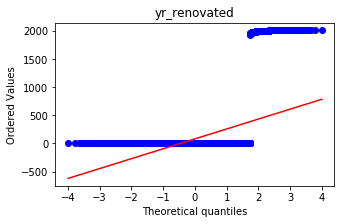

In [54]:
#compare continous variables to normal distribution
for col in cont_var.columns:
    fig, ax=plt.subplots(figsize=(5,3))
    sp.stats.probplot(cont_var[col], plot=ax, fit=True)
    ax.set_title(col)


## iv. Scaling Continous Variables 

In [55]:
scaler = StandardScaler()
scaled_cont_var = scaler.fit_transform(cont_var)
scaled_cont_var = pd.DataFrame(scaled_cont_var, columns=cont_var.columns)

In [56]:
scaled_cont_var.head()

,age,bedrooms,bathrooms,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,floors,yr_renovated
0,0.545272,-0.398550,-1.486278,-0.742066,-0.660958,-1.016309,-0.946232,-0.227034,-0.262637,-0.908282,-0.207077
1,0.681792,-0.398550,0.215751,0.519507,0.273310,0.616251,-0.420816,-0.188081,-0.187977,0.946060,4.816757
2,1.296133,-1.530329,-1.486278,-1.264536,-0.660958,-1.497855,1.125409,-0.120596,-0.172099,-0.908282,-0.207077
3,0.203972,0.733229,1.236968,-0.907727,1.464501,-0.100196,-0.916208,-0.242939,-0.287035,-0.908282,-0.207077
4,-0.546890,-0.398550,-0.124655,-0.104908,-0.660958,-0.429057,-0.255685,-0.167576,-0.193082,-0.908282,-0.207077


## v. Create Dummy Variables for Categorical Variables

In [57]:
dummies = pd.DataFrame([])


wf_dummies = pd.get_dummies(updated_df.waterfront.astype('category'), prefix="wf", drop_first=True)
grade_dummies = pd.get_dummies(updated_df.grade.astype('category'), prefix="grade", drop_first=True)
condition_dummies = pd.get_dummies(updated_df.condition.astype('category'), prefix="condition", drop_first=True)
zipcode_dummies = pd.get_dummies(updated_df.zipcode.astype('category'), prefix="zipcode", drop_first=True)


### DataFrame with non-scaled, non_transformed predictors

In [58]:
sc_data_fin = pd.DataFrame([])

price = updated_df['log_price']

sc_data_fin = pd.concat([price, scaled_cont_var, wf_dummies, grade_dummies, 
                         condition_dummies, zipcode_dummies], axis=1)

sc_data_fin = sc_data_fin.dropna()

## vi. Testing for Interaction

In [ ]:
data_fin.columns

In [ ]:
plt.figure(figsize=(11,8))
sns.pairplot(updated_df, vars=['log_price', 'bathrooms', 'sqft_living'],
                 kind='reg', hue='condition')

#  Regressions

## I. Series i: non-scaled independent variables

In [82]:
data_fin = pd.DataFrame([])
price = updated_df['log_price']

data_fin = pd.concat([price, cont_var, wf_dummies, grade_dummies, 
                         condition_dummies, zipcode_dummies], axis=1)

data_fin = data_fin.dropna()

In [84]:
outcome = 'log_price'
predictors = data_fin.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [85]:
model = ols(formula= formula, data=data_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:47:42   Log-Likelihood:                 5843.7
No. Observations:               21352   AIC:                        -1.150e+04
Df Residuals:                   21256   BIC:                        -1.073e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2203      0.186     60.304      0.000      10.856      11.585
age               0.0008   7.69e-05     10.503      0.000       0.001       0.001
bedrooms         -0.0047      0.002     -2.431      0.015      -0.008      -0.001
bathrooms         0.0432      0.003     13.805      0.000       0.037       0.049
sqft_above     9.267e-05   2.31e-06     40.172      0.000    8.81e-05    9.72e-05
sqft_basement  2.788e-05   2.55e-06     10.917      0.000    2.29e-05    3.29e-05
sqft_living       0.0001   2.25e-06     53.687      0.000       0.000       0.000
sqft_living15  9.672e-05   3.41e-06     28.401      0.000       9e-05       0.000
sqft_lot       6.649e-07   4.44e-08     14.973      0.000    5.78e-07    7.52e-07
sqft_lot15     1.095e-07   7.09e-08      1.545      0.122   -2.94e-08    2.48e-07
floors           -0.0349      0.004     -9.372      0.000      -0.042      -0.028
yr_renovated    3.51e-05   3.46e-06     10.132      0.000    2.83e-05    4.19e-05
wf_1              0.6245      0.018     34.687      0.000       0.589       0.660
grade_3           0.1777      0.217      0.819      0.413      -0.248       0.603
grade_4           0.0743      0.192      0.387      0.698      -0.302       0.450
grade_5           0.1043      0.189      0.551      0.581      -0.266       0.475
grade_6           0.2195      0.189      1.162      0.245      -0.151       0.590
grade_7           0.3433      0.189      1.817      0.069      -0.027       0.714
grade_8           0.4479      0.189      2.369      0.018       0.077       0.818
grade_9           0.5519      0.189      2.918      0.004       0.181       0.923
grade_10          0.5934      0.189      3.136      0.002       0.223       0.964
grade_11          0.6146      0.190      3.243      0.001       0.243       0.986
grade_12          0.6423      0.191      3.361      0.001       0.268       1.017
grade_13          0.9271      0.265      3.504      0.000       0.408       1.446
condition_2       0.1251      0.037      3.358      0.001       0.052       0.198
condition_3       0.2532      0.035      7.300      0.000       0.185       0.321
condition_4       0.2997      0.035      8.636      0.000       0.232       0.368
condition_5       0.3587      0.035     10.272      0.000       0.290       0.427
zipcode_98002    -0.0222      0.016     -1.354      0.176      -0.054       0.010
zipcode_98003     0.0119      0.015      0.810      0.418      -0.017       0.041
zipcode_98004     1.0674      0.015     71.701      0.000       1.038       1.097
zipcode_98005     0.6980      0.017     39.997      0.000       0.664       0.732
zipcode_98006     0.6163      0.013     46.900      0.000       0.591       0.642
zipcode_98007     0.6226      0.018     33.848      0.000       0.587       0.659
zipcode_98008     0.6393      0.015     43.164   

In [88]:
#Adjusting coefficients in order to interpret
adjusted_coef = (np.exp(model.params)-1)*100

In [89]:
adjusted_coef

Intercept        7.462609e+06
age              8.083725e-02
bedrooms        -4.688739e-01
bathrooms        4.409693e+00
sqft_above       9.267011e-03
sqft_basement    2.787551e-03
sqft_living      1.205484e-02
sqft_living15    9.672878e-03
sqft_lot         6.648771e-05
sqft_lot15       1.095054e-05
floors          -3.429194e+00
yr_renovated     3.509749e-03
wf_1             8.673081e+01
grade_3          1.944808e+01
grade_4          7.709949e+00
grade_5          1.098920e+01
grade_6          2.454659e+01
grade_7          4.096036e+01
grade_8          5.650168e+01
grade_9          7.365103e+01
grade_10         8.101918e+01
grade_11         8.488677e+01
grade_12         9.009267e+01
grade_13         1.527241e+02
condition_2      1.333098e+01
condition_3      2.881796e+01
condition_4      3.495041e+01
condition_5      4.314545e+01
zipcode_98002   -2.196771e+00
zipcode_98003    1.199075e+00
                     ...     
zipcode_98092    1.289920e+00
zipcode_98102    1.496333e+02
zipcode_98

### INTERPRETATION! 

## I. Series ii: scaled independent variables

### Regression 1: all Independent Variables

In [83]:
sc_data_fin = pd.DataFrame([])
price = updated_df['log_price']
sc_data_fin = pd.concat([price, scaled_cont_var, wf_dummies, grade_dummies, 
                         condition_dummies, zipcode_dummies], axis=1)

sc_data_fin = sc_data_fin.dropna()

In [59]:
sc_outcome = 'log_price'
sc_predictors = sc_data_fin.drop('log_price', axis=1)
sc_pred_sum = "+".join(sc_predictors.columns)
sc_formula = sc_outcome + "~" + sc_pred_sum

In [60]:
sc_model = ols(formula= sc_formula, data=sc_data_fin).fit()
sc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     784.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:11:01   Log-Likelihood:                 713.54
No. Observations:               21095   AIC:                            -1235.
Df Residuals:                   20999   BIC:                            -471.2
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3181      0.236     47.866      0.000      10.855      11.782
age               0.0003      0.002      0.148      0.882      -0.004       0.005
bedrooms          0.0014      0.002      0.697      0.486      -0.003       0.006
bathrooms        -0.0068      0.003     -2.352      0.019      -0.012      -0.001
sqft_above        0.0034      0.002      1.841      0.066      -0.000       0.007
sqft_basement     0.0012      0.002      0.713      0.476      -0.002       0.005
sqft_living       0.0037      0.002      2.119      0.034       0.000       0.007
sqft_living15    -0.0015      0.003     -0.561      0.575      -0.007       0.004
sqft_lot         -0.0064      0.002     -2.776      0.006      -0.011      -0.002
sqft_lot15        0.0057      0.002      2.435      0.015       0.001       0.010
floors           -0.0007      0.002     -0.301      0.763      -0.005       0.004
yr_renovated     -0.0002      0.002     -0.121      0.904      -0.004       0.003
wf_1              0.6827      0.023     30.062      0.000       0.638       0.727
grade_3           0.3776      0.276      1.368      0.171      -0.163       0.919
grade_4           0.3843      0.244      1.576      0.115      -0.094       0.862
grade_5           0.4770      0.240      1.984      0.047       0.006       0.948
grade_6           0.6437      0.240      2.680      0.007       0.173       1.115
grade_7           0.8842      0.240      3.681      0.000       0.413       1.355
grade_8           1.1241      0.240      4.679      0.000       0.653       1.595
grade_9           1.4126      0.240      5.879      0.000       0.942       1.883
grade_10          1.6171      0.240      6.728      0.000       1.146       2.088
grade_11          1.8507      0.241      7.691      0.000       1.379       2.322
grade_12          2.0794      0.242      8.576      0.000       1.604       2.555
grade_13          2.5091      0.336      7.470      0.000       1.851       3.167
condition_2       0.0630      0.047      1.331      0.183      -0.030       0.156
condition_3       0.1872      0.044      4.248      0.000       0.101       0.274
condition_4       0.2532      0.044      5.742      0.000       0.167       0.340
condition_5       0.3445      0.044      7.768      0.000       0.258       0.431
zipcode_98002    -0.0372      0.021     -1.783      0.075      -0.078       0.004
zipcode_98003    -0.0076      0.019     -0.403      0.687      -0.044       0.029
zipcode_98004     1.1233      0.019     59.163      0.000       1.086       1.160
zipcode_98005     0.7534      0.022     34.021      0.000       0.710       0.797
zipcode_98006     0.6578      0.017     39.507      0.000       0.625       0.690
zipcode_98007     0.6130      0.023     26.206      0.000       0.567       0.659
zipcode_98008     0.6511      0.019     34.552   

### Regression 2: removing variables with non-significant p-values from first model

**including:** 
bathrooms,  sqft_living,  sqft_lot,  sqft_lot15,  wf,  grade,  condition,  zipcode

**excluding:**
age,  bedrooms,  sqft_above,  sqft_basement,  sqft_living15,  floors,  yr_renovated

In [61]:
sc_outcome_1 = 'log_price'
sc_predictors_1 = sc_data_fin.drop(['log_price','age','bedrooms','sqft_above','sqft_basement',
                                    'sqft_living15','floors','yr_renovated'], axis=1)
sc_pred_sum_1 = "+".join(sc_predictors_1.columns)
sc_formula_1 = sc_outcome_1 + "~" + sc_pred_sum_1

In [62]:
sc_model_1 = ols(formula= sc_formula_1, data=sc_data_fin).fit()
sc_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     837.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:17:30   Log-Likelihood:                 713.00
No. Observations:               21095   AIC:                            -1246.
Df Residuals:                   21005   BIC:                            -529.9
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.3202      0.236     47.903      0.000      10.857      11.783
bathrooms        -0.0070      0.002     -2.928      0.003      -0.012      -0.002
sqft_living       0.0067      0.002      2.767      0.006       0.002       0.011
sqft_lot         -0.0063      0.002     -2.762      0.006      -0.011      -0.002
sqft_lot15        0.0055      0.002      2.384      0.017       0.001       0.010
wf_1              0.6827      0.023     30.069      0.000       0.638       0.727
grade_3           0.3775      0.276      1.368      0.171      -0.163       0.918
grade_4           0.3818      0.244      1.567      0.117      -0.096       0.859
grade_5           0.4742      0.240      1.974      0.048       0.003       0.945
grade_6           0.6410      0.240      2.670      0.008       0.170       1.112
grade_7           0.8815      0.240      3.672      0.000       0.411       1.352
grade_8           1.1213      0.240      4.670      0.000       0.651       1.592
grade_9           1.4097      0.240      5.871      0.000       0.939       1.880
grade_10          1.6143      0.240      6.720      0.000       1.143       2.085
grade_11          1.8479      0.240      7.684      0.000       1.377       2.319
grade_12          2.0765      0.242      8.569      0.000       1.602       2.551
grade_13          2.5065      0.336      7.465      0.000       1.848       3.165
condition_2       0.0639      0.047      1.349      0.177      -0.029       0.157
condition_3       0.1878      0.044      4.264      0.000       0.101       0.274
condition_4       0.2539      0.044      5.759      0.000       0.167       0.340
condition_5       0.3452      0.044      7.785      0.000       0.258       0.432
zipcode_98002    -0.0375      0.021     -1.795      0.073      -0.078       0.003
zipcode_98003    -0.0076      0.019     -0.404      0.686      -0.044       0.029
zipcode_98004     1.1232      0.019     59.181      0.000       1.086       1.160
zipcode_98005     0.7534      0.022     34.036      0.000       0.710       0.797
zipcode_98006     0.6579      0.017     39.537      0.000       0.625       0.691
zipcode_98007     0.6131      0.023     26.221      0.000       0.567       0.659
zipcode_98008     0.6512      0.019     34.571      0.000       0.614       0.688
zipcode_98010     0.3167      0.027     11.877      0.000       0.264       0.369
zipcode_98011     0.4739      0.021     22.673      0.000       0.433       0.515
zipcode_98014     0.3822      0.025     15.464      0.000       0.334       0.431
zipcode_98019     0.3917      0.021     18.453      0.000       0.350       0.433
zipcode_98022     0.1090      0.020      5.502      0.000       0.070       0.148
zipcode_98023    -0.0532      0.016     -3.259      0.001      -0.085      -0.021
zipcode_98024     0.5375      0.029     18.229   

In [154]:
sc_outcome_1 = 'log_price'
sc_predictors_1 = sc_data_fin.drop(['log_price','age','bedrooms','sqft_above','sqft_basement',
                                    'sqft_living15','floors','yr_renovated'], axis=1)

x_train,x_test,y_train,y_test=train_test_split(sc_predictors_1,sc_data_fin['log_price'],test_size=0.2)

# train = pd.DataFrame([])
# train = pd.concat([x_train,y_train])
# train.head()

x_train.columns

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'wf_1', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_

### Explanation of sc_model_1 Regression:

The above model takes in parameters for bathrooms,  sqft_living,  sqft_lot,  sqft_lot15,  wf,  grade,  condition,  zipcode. All p-values in this model are less than the threshold 0.05. This means that, assuming the null hypothesis (i.e. that the coefficients = 0), the probability of any of the above variables having the non-zero value that it has
is less than 5%. The effect-size, or the magnitude of the associated change in price for a unit change in a particular IV can be gaged by looking at the coefficients. 


In order to interpret the coefficients, we need to adjust for having log transformed the dependent variable (i.e. price). I do this by exponentiating the coefficients, subtracting 1 from the result, and multiplying by 100 in order to interpret the associated percent change in price for a 1 unit change in each x.


In [86]:
#Adjusting coefficients in order to interpret
sc_adjusted_coef = (np.exp(sc_model_1.params)-1)*100

In [87]:
sc_max_coef = max(sc_adjusted_coef)
sc_min_coef = min(sc_adjusted_coef)
sc_adjusted_coef.describe()

count    9.000000e+01
mean     9.172912e+04
std      8.693165e+05
min     -7.241292e+00
25%      2.427713e+01
50%      6.315229e+01
75%      1.015343e+02
max      8.247155e+06
dtype: float64

In [142]:
print(sc_adjusted_coef['zipcode_98032'])
print(sc_adjusted_coef['zipcode_98039'])

-7.2412924732964346
278.13261621834783


In [143]:
sc_adjusted_coef

Intercept        8.247155e+06
bathrooms       -6.997940e-01
sqft_living      6.751833e-01
sqft_lot        -6.314159e-01
sqft_lot15       5.521544e-01
wf_1             9.791576e+01
grade_3          4.585965e+01
grade_4          4.649052e+01
grade_5          6.067042e+01
grade_6          8.983439e+01
grade_7          1.414525e+02
grade_8          2.068706e+02
grade_9          3.094836e+02
grade_10         4.024359e+02
grade_11         5.346689e+02
grade_12         6.976561e+02
grade_13         1.126195e+03
condition_2      6.597276e+00
condition_3      2.065760e+01
condition_4      2.890362e+01
condition_5      4.122306e+01
zipcode_98002   -3.678408e+00
zipcode_98003   -7.547998e-01
zipcode_98004    2.074787e+02
zipcode_98005    1.124300e+02
zipcode_98006    9.307751e+01
zipcode_98007    8.462072e+01
zipcode_98008    9.178191e+01
zipcode_98010    3.725662e+01
zipcode_98011    6.063166e+01
                     ...     
zipcode_98092    4.066134e+00
zipcode_98102    1.232295e+02
zipcode_98

# Checking Assumptions of Linear Regression
### 1. Linearity: underlying relationship between independent and dependent variable is linear
  **Initial EDA and Graphs checked for this, but could be wrong**
### 2. Homoscedasticity: a dependent variable's variability is equal across values of the independent variable.
### 3. Normally Distributed Residuals: 
### 4. No Multicollinearity: reducing correlation between independent variables
  **Correlation HeatMap allowed us to remove features that were overwhelmingly correlated with one another**
  
### This means we still need to check assumption 2 & 3

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


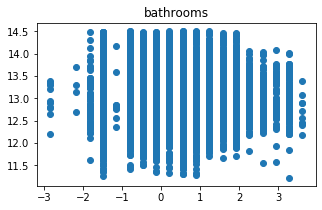

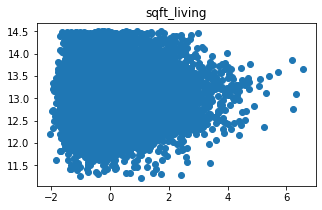

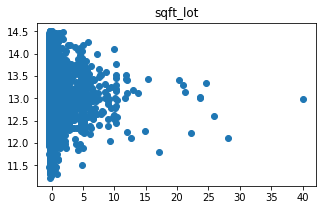

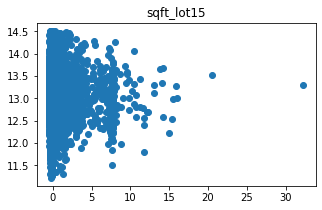

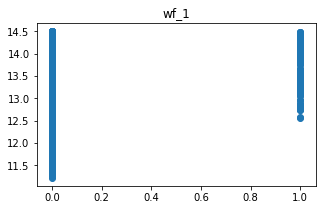

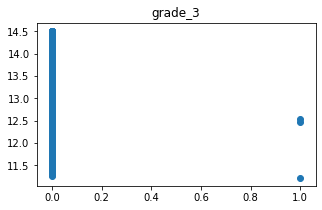

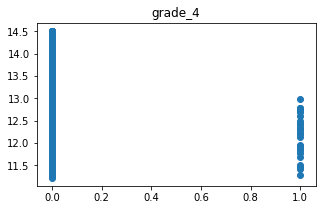

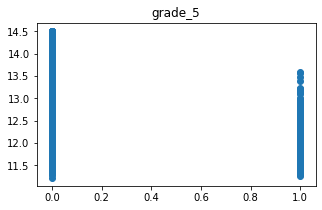

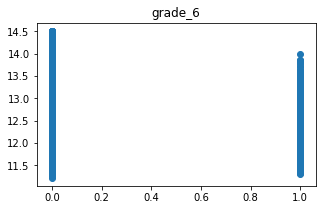

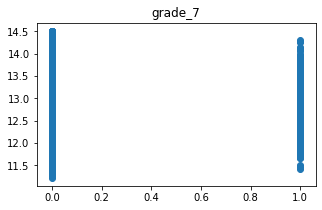

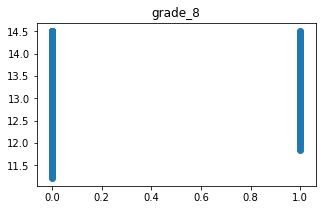

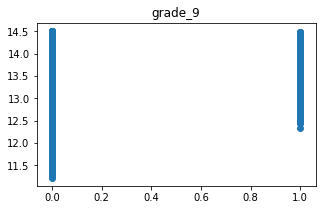

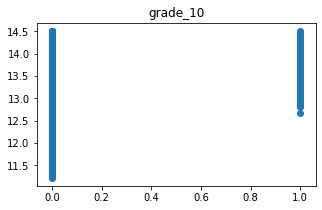

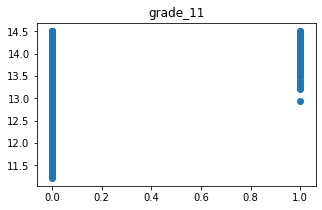

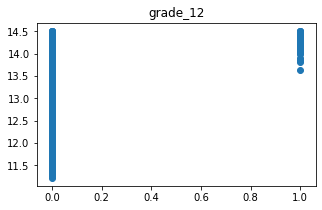

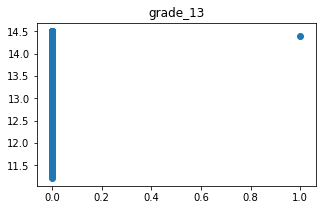

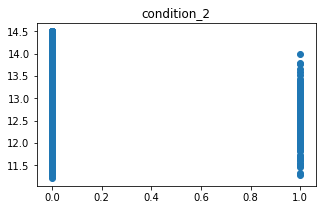

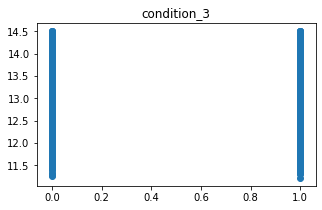

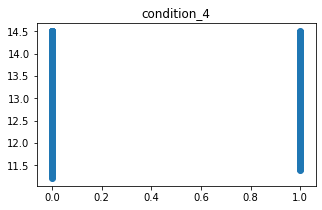

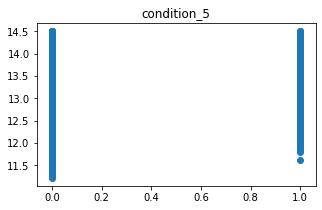

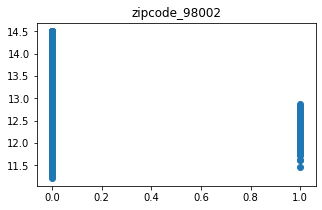

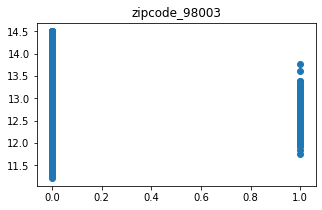

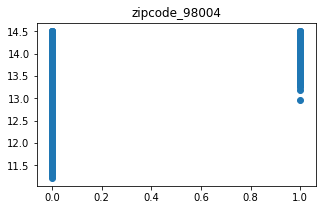

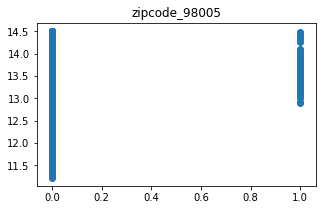

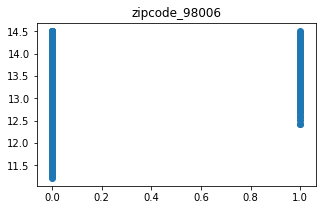

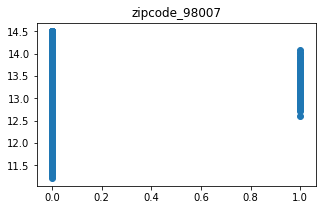

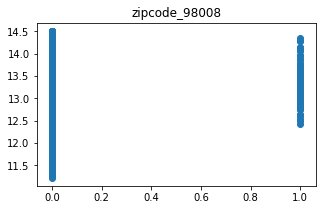

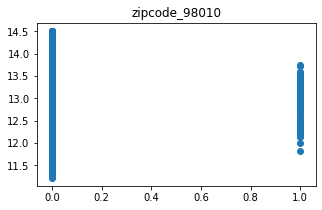

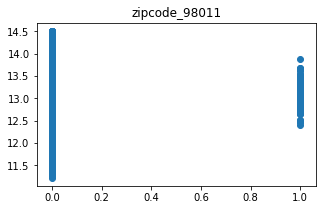

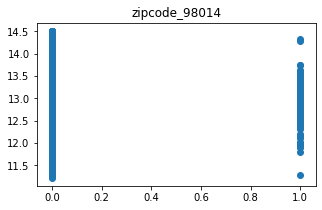

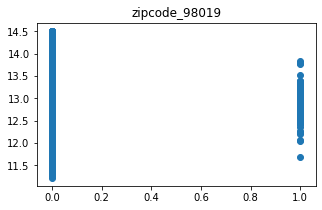

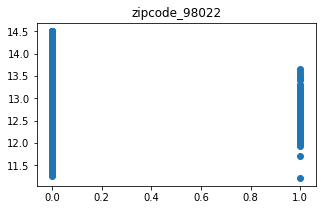

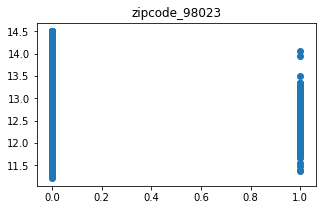

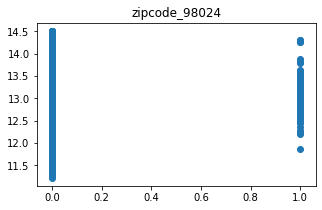

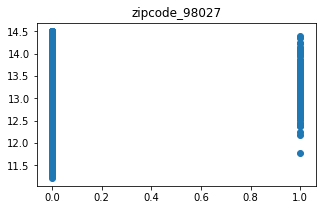

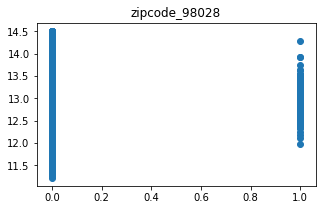

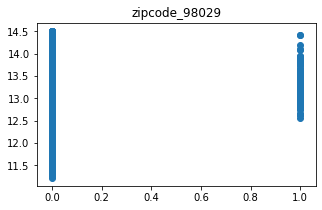

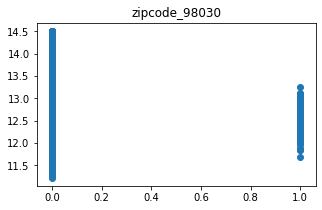

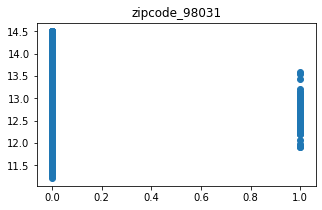

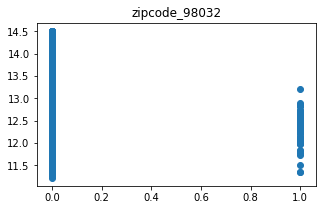

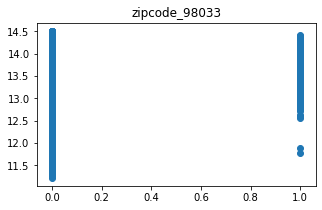

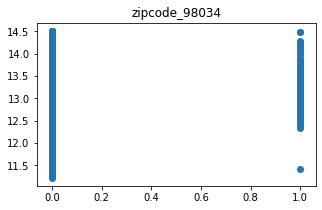

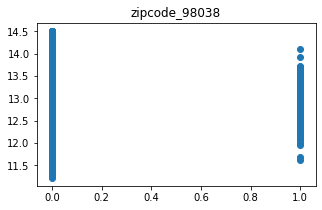

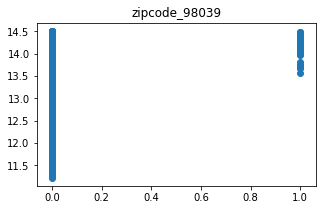

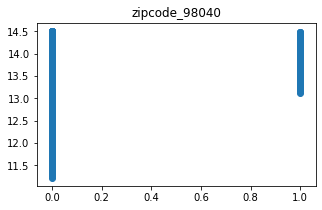

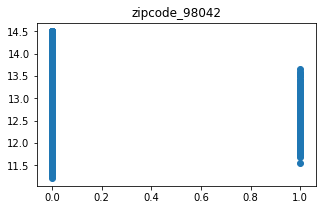

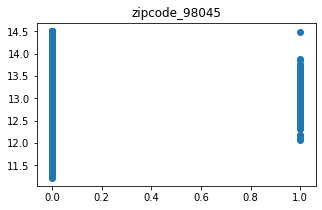

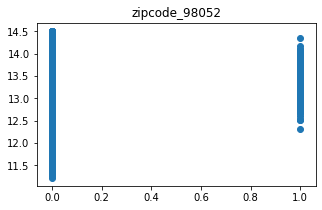

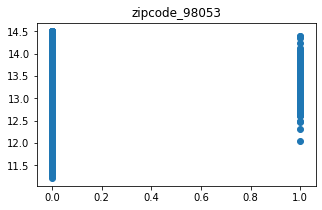

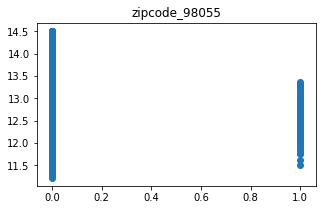

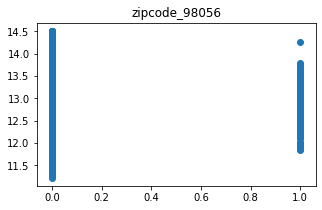

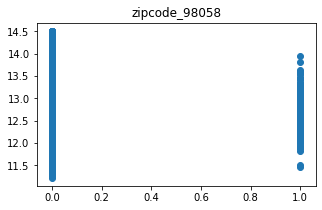

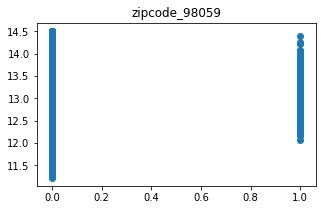

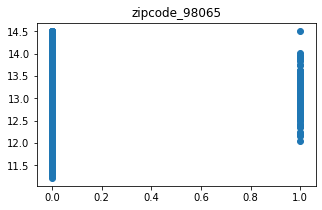

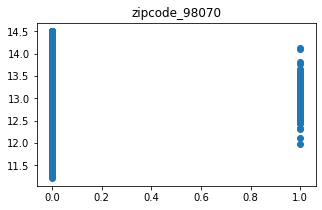

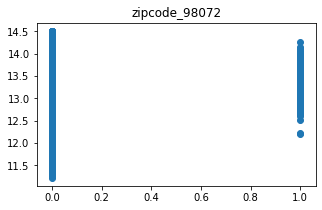

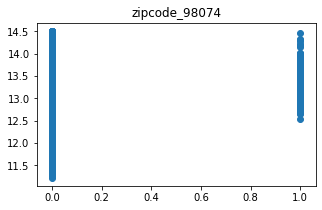

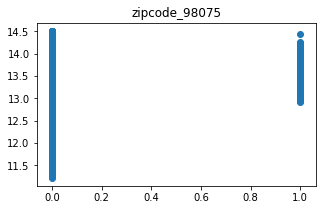

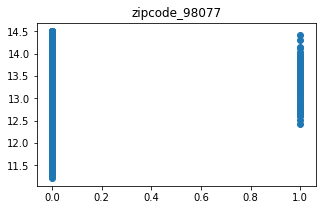

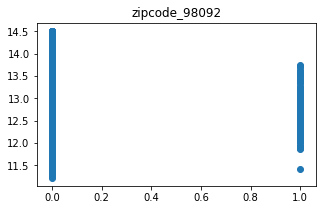

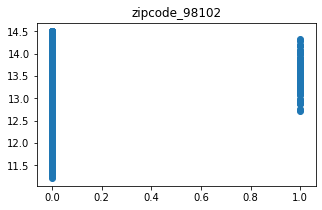

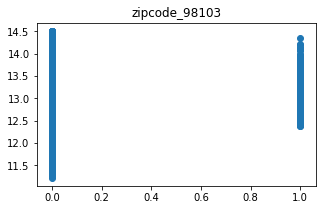

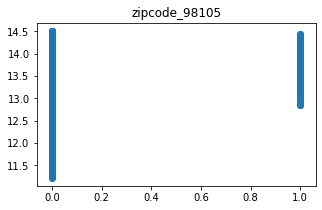

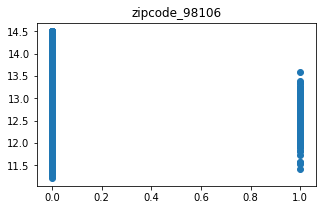

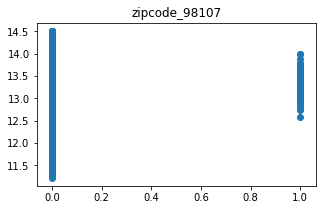

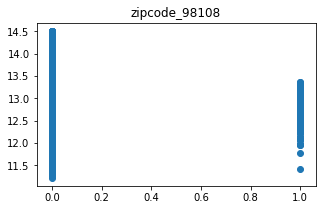

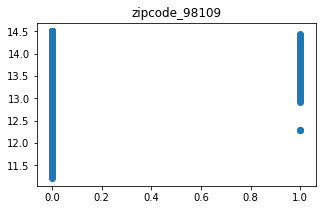

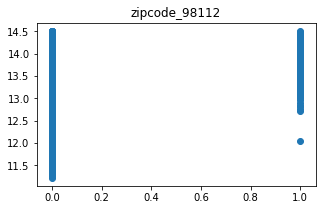

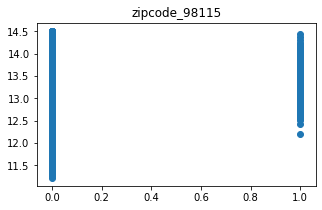

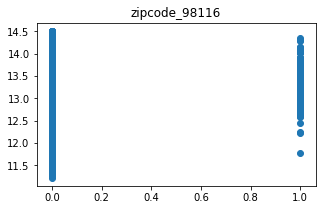

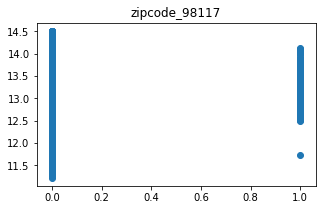

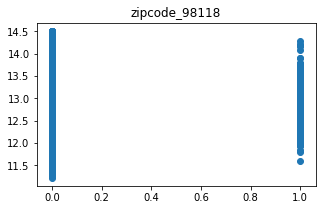

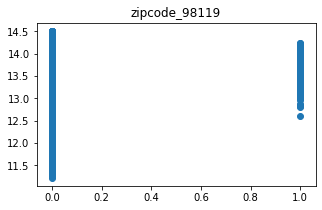

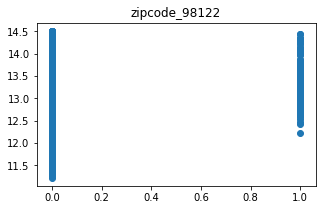

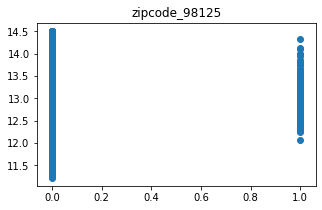

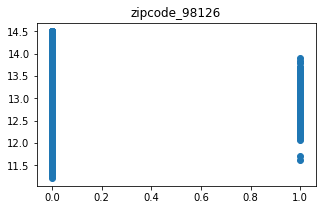

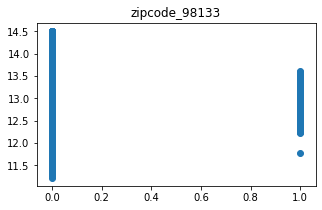

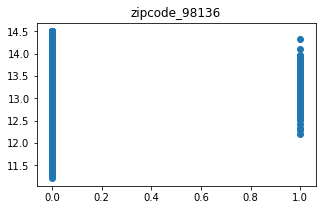

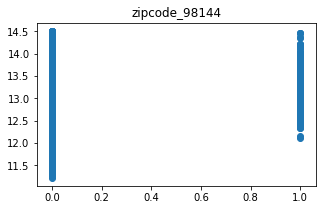

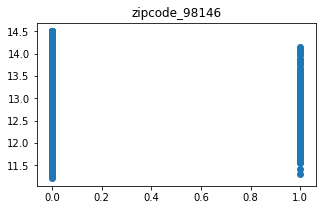

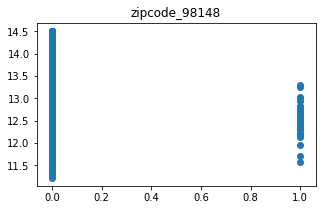

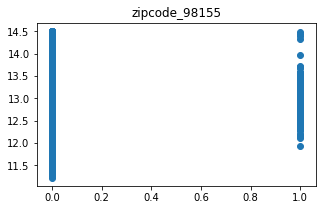

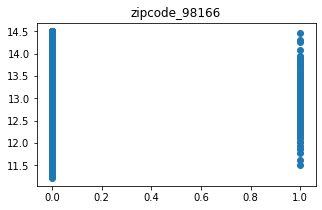

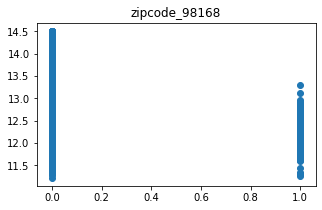

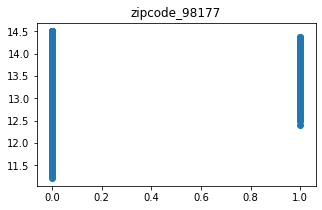

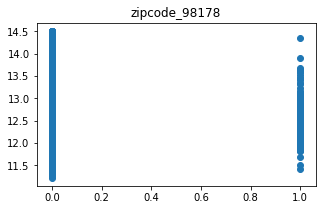

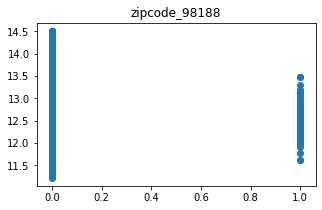

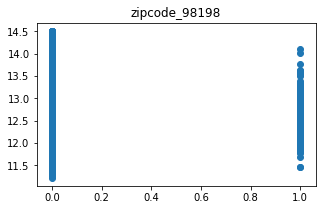

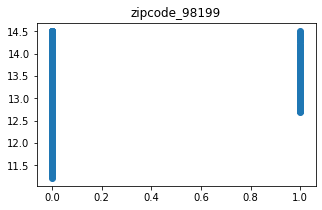

In [144]:
for col in sc_predictors_1.columns:
    fig, ax=plt.subplots(figsize=(5,3))
    plt.scatter(x=sc_predictors_1[col], y=sc_data_fin['log_price'])
    ax.set_title(col)

In [122]:
def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid
    
    fig, ax = plt.subplots(1,2,figsize=(20,10))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
   

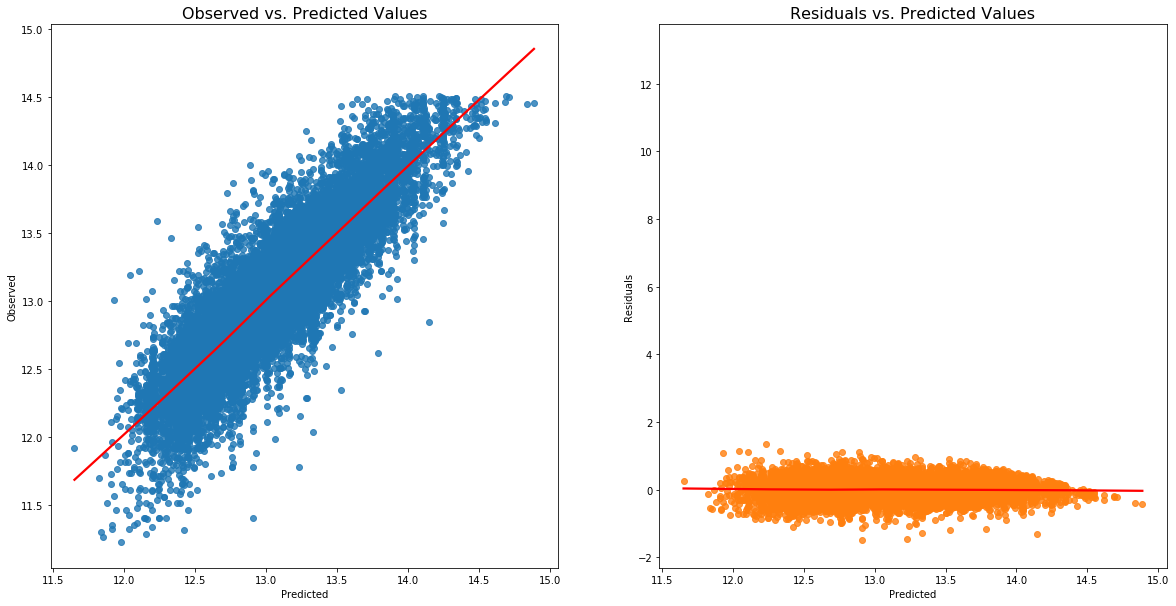

In [123]:
linearity_test(sc_model_1, sc_data_fin['log_price'])

In [124]:
pred_val = sc_model_1.fittedvalues.copy()
true_val = sc_data_fin['log_price'].values.copy()
residual = true_val - pred_val

Text(0.5, 1.0, 'residuals')

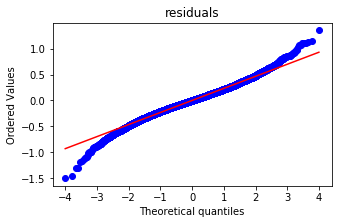

In [125]:
fig, ax=plt.subplots(figsize=(5,3))
sp.stats.probplot(residual, plot=ax, fit=True)
ax.set_title('residuals')

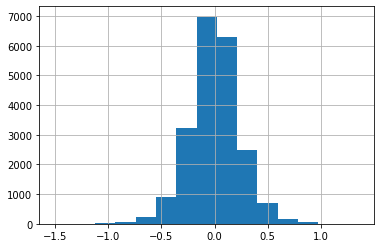

In [126]:
residual.hist(bins=15)

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


X = sc_predictors_1
y = sc_data_fin

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results
# cv_5_results  = np.mean(cross_val_score(linreg.fit(X,y), X, y, cv=5,  scoring='neg_mean_squared_error'))
# cv_10_results = np.mean(cross_val_score(linreg.fit(X,y), X, y, cv=10, scoring='neg_mean_squared_error'))
# cv_20_results = np.mean(cross_val_score(linreg.fit(X,y), X, y, cv=20, scoring='neg_mean_squared_error'))

# print(cv_5_results,cv_10_results,cv_20_results)

-2.914155106467909e+20

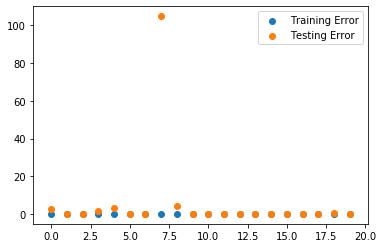

In [135]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(predictors, data_fin['log_price'], test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## I. Series iii: Using a stepwise function

#### This function takes in a dataframe of predictors and a dependent variable.... EXPLAIN FUNCTION!

In [90]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [91]:
stepwise_selection(predictors, data_fin['log_price'],verbose=True)

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_above                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  age                            with p-value 2.51408e-207
Add  sqft_living15                  with p-value 3.74393e-230
Add  floors                         with p-value 5.82673e-306
Add  zipcode_98004                  with p-value 8.50319e-197
Add  zipcode_98023                  with p-value 4.98012e-183
Add  grade_6                        with p-value 1.10647e-169
Add  grade_7                        with p-value 1.76387e-255
Add  grade_5                        with p-value 1.88727e-224
Add  grade_8                        with p-value 2.78784e-204
Add  zipcode_98042                  with p-value 8.10166e-122
Add  zipcode_98092                  with p-value 6.43874e-131
Add  zipcode_98003                  with p-value 3.84182e-127
Add  zipcode_98033                  with p-value 1.17858e-108
Add  zipcode_98168                 

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zipcode_98122                  with p-value 2.69344e-84
Add  zipcode_98102                  with p-value 6.64582e-69
Add  zipcode_98039                  with p-value 8.18972e-70
Add  zipcode_98052                  with p-value 1.54935e-53
Add  zipcode_98006                  with p-value 5.74447e-57
Add  zipcode_98136                  with p-value 1.22511e-59
Add  zipcode_98144                  with p-value 1.47774e-60
Add  zipcode_98008                  with p-value 2.46258e-62
Add  zipcode_98005                  with p-value 7.93208e-63
Add  sqft_lot                       with p-value 6.77685e-60
Add  condition_5                    with p-value 8.76647e-50
Add  zipcode_98053                  with p-value 1.05729e-43
Add  zipcode_98029                  with p-value 6.16967e-44
Add  zipcode_98034                  with p-value 3.8933e-48
Add  zipcode_98125                  with p-value 2.4299e-48
Add  zipcode_98177                  with p-value 1.33559e-51
Add  zipcode_98126        

['sqft_above',
 'sqft_basement',
 'sqft_living',
 'age',
 'sqft_living15',
 'zipcode_98004',
 'zipcode_98023',
 'grade_6',
 'grade_7',
 'grade_5',
 'grade_8',
 'zipcode_98092',
 'zipcode_98003',
 'zipcode_98033',
 'zipcode_98058',
 'zipcode_98038',
 'zipcode_98002',
 'zipcode_98032',
 'zipcode_98178',
 'wf_1',
 'zipcode_98040',
 'grade_4',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98117',
 'zipcode_98103',
 'zipcode_98199',
 'zipcode_98105',
 'zipcode_98119',
 'zipcode_98107',
 'zipcode_98116',
 'zipcode_98109',
 'zipcode_98122',
 'zipcode_98102',
 'zipcode_98039',
 'zipcode_98052',
 'zipcode_98006',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98008',
 'zipcode_98005',
 'sqft_lot',
 'condition_5',
 'zipcode_98053',
 'zipcode_98029',
 'zipcode_98034',
 'zipcode_98125',
 'zipcode_98177',
 'zipcode_98126',
 'zipcode_98007',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98027',
 'bathrooms',
 'condition_4',
 'condition_3',
 'zipcode_98118',
 'zipcode_98133',
 'zipcode_98072',
 'zipco